# Data Exploration

In [2]:
import pandas as pd, numpy as np #basic package
from scipy import stats
from sklearn import preprocessing
from copy import deepcopy
from collections import Counter

In [3]:
# Data Exploration
data = pd.read_csv('diabetic_data.csv', na_values = ["?","Unknown/Invalid",""])
print(data.shape)
#data.head()
#data.info()
print(data.iloc[:,0:11].describe(include = 'all'))
print(data.iloc[:,11:21].describe(include = 'all'))
print(data.iloc[:,21:31].describe(include = 'all')) # chlorpropamide，acetohexamide
print(data.iloc[:,31:41].describe(include = 'all')) # tolbutamide,miglitol, troglitazone, tolazamide, examide, citoglipton
print(data.iloc[:,41:51].describe(include = 'all')) # glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone
# metformin-pioglitazone
data.isnull().T.any().T.sum() # 100723 incomplete cases
data.isnull().sum() # Weight, payer_code, medical_specialty has about half missing values
#data.gender.value_counts() # Unknown/Invalid as a gender type

/Users/toothacher17/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(101766, 50)
        encounter_id   patient_nbr       race  gender      age    weight  \
count   1.017660e+05  1.017660e+05      99493  101763   101766      3197   
unique           NaN           NaN          5       2       10         9   
top              NaN           NaN  Caucasian  Female  [70-80)  [75-100)   
freq             NaN           NaN      76099   54708    26068      1336   
mean    1.652016e+08  5.433040e+07        NaN     NaN      NaN       NaN   
std     1.026403e+08  3.869636e+07        NaN     NaN      NaN       NaN   
min     1.252200e+04  1.350000e+02        NaN     NaN      NaN       NaN   
25%     8.496119e+07  2.341322e+07        NaN     NaN      NaN       NaN   
50%     1.523890e+08  4.550514e+07        NaN     NaN      NaN       NaN   
75%     2.302709e+08  8.754595e+07        NaN     NaN      NaN       NaN   
max     4.438672e+08  1.895026e+08        NaN     NaN      NaN       NaN   

        admission_type_id  discharge_disposition_id  admission_source_id  

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

## Transformation of labels

In [4]:
#table of readmission status column
print(data.readmitted.value_counts())
readmitted_tran = data.readmitted.apply(lambda x: 1 if x == "<30" else 0)
print(readmitted_tran.value_counts())
print(readmitted_tran.value_counts()/101766)

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64
0    90409
1    11357
Name: readmitted, dtype: int64
0    0.888401
1    0.111599
Name: readmitted, dtype: float64


## Drop Variables 

In [5]:
df = data.copy()
df = df.drop(["encounter_id"], axis = 1) # unrelated variable
df = df.drop(["patient_nbr"],1) # unrelated variable
df = df.drop(["chlorpropamide",
           "acetohexamide",
           "tolbutamide",
           "miglitol", 
           "troglitazone", 
           "tolazamide", 
           "examide", 
           "citoglipton",
           "glipizide-metformin", 
           "glimepiride-pioglitazone",
           "metformin-rosiglitazone",
           "metformin-pioglitazone"],axis = 1)# duplicates > 101700
df = df.drop(["readmitted"],1)
df = df.drop(["weight"],1) # too many missing values
print(df.shape)
#print(df.info())

(101766, 34)


## Check Data Type

In [38]:
df.admission_type_id = df.admission_type_id.astype("category")
df.discharge_disposition_id = df.discharge_disposition_id.astype("category")
df.admission_source_id = df.admission_source_id.astype("category")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 34 columns):
race                        99493 non-null object
gender                      101763 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null category
discharge_disposition_id    101766 non-null category
admission_source_id         101766 non-null category
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      101745 non-null object
diag_2                      101408 non-null object
diag_3                    

## Missing Values Imputation

In [8]:
df['race'].replace(np.nan, 'NA', inplace = True)
df["medical_specialty"].replace(np.nan, 'NA', inplace = True)
df["payer_code"].replace(np.nan, 'NA', inplace = True)
df["diag_1"].replace(np.nan, 'NA', inplace = True)
df["diag_2"].replace(np.nan, 'NA', inplace = True)
df["diag_3"].replace(np.nan, 'NA', inplace = True)
df["gender"].replace(np.nan, 'NA', inplace = True)
df.isnull().sum()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 34 columns):
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      101766 non-null object
diag_2                      101766 non-null object
diag_3                      1017

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed'],
      dtype='object')

## Group diag_1, diag_2, diag_3

In [9]:
# function to regroup diag_1, diag_2, diag_3 codes

def group_diag(diags):
    groups = []
    other = []
    group = "null"
    for diag in diags:
        try:
            diag = pd.to_numeric(diag)
            if diag >= 390 and diag <= 459.789:
                diag = "Circulatory"
            elif diag >= 460 and diag <= 529.786:
                diag = "Respiratory"
            elif diag >= 520 and diag <= 579.787:
                diag = "Digestive"                    
            elif diag >= 250 and diag < 251:
                diag = "Diabetes"
            elif diag >= 800 and diag <=999:
                diag = "Injury"
            elif diag >= 710 and diag <=739:
                diag = "Musculoskeletal"
            elif diag >= 580 and diag <=629.788:
                diag = "Neoplasms"
            elif diag >= 780 and diag <= 799.9:
                diag = "Symptoms"
            elif diag >= 680 and diag <= 709.9:
                diag = "Skin"
            elif diag >= 276 and diag <= 279.9:
                diag = "Endoctrine"
            else:
                other.append(diag)
                diag = "other"
        except ValueError:
            other.append(diag)
            diag = "other"
        groups.append(diag)
    return([groups, other])

In [10]:
# import re
# data.diag_1[data.diag_1.apply(lambda x: True if re.match("[a-zA-Z].", str(x)) is not None else False)].value_counts()
# data.diag_2[data.diag_2.apply(lambda x: True if re.match("[a-zA-Z].", str(x)) is not None else False)].value_counts()
# data.diag_3[data.diag_3.apply(lambda x: True if re.match("[a-zA-Z].", str(x)) is not None else False)].value_counts()

g_diag_1 = group_diag(df.diag_1)
g_diag_2 = group_diag(df.diag_2)
g_diag_3 = group_diag(df.diag_3)

# Check whether there are big categories ignored in "other"
# Counter(g_diag_1[1])
# Counter(g_diag_2[1])
# Counter(g_diag_3[1])

## Normalize Numerical Variable

In [11]:
numeric_list = ["time_in_hospital","num_lab_procedures","num_procedures","num_medications",
               "number_outpatient","number_emergency","number_inpatient","number_diagnoses"]
df[numeric_list].apply(pd.to_numeric)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1,41,0,1,0,0,0,1
1,3,59,0,18,0,0,0,9
2,2,11,5,13,2,0,1,6
3,2,44,1,16,0,0,0,7
4,1,51,0,8,0,0,0,5
5,3,31,6,16,0,0,0,9
6,4,70,1,21,0,0,0,7
7,5,73,0,12,0,0,0,8
8,13,68,2,28,0,0,0,8
9,12,33,3,18,0,0,0,8


In [12]:
normalizer = preprocessing.Normalizer().fit(df[numeric_list])
normalized = normalizer.transform(df[numeric_list])
df_normalized = pd.DataFrame(normalized, columns = ["time_in_hospital","num_lab_procedures","num_procedures","num_medications",
               "number_outpatient","number_emergency","number_inpatient","number_diagnoses"] )
#print(df_normalized)
df = pd.concat([df.drop(numeric_list,1),df_normalized],1)

## Tranfer categorical variables to dummy variables

In [21]:
df2 = df.copy()
df2['g_diag_1'] = g_diag_1[0]
df2['g_diag_2'] = g_diag_2[0]
df2['g_diag_3'] = g_diag_3[0]
df2 = df2.drop(['diag_1','diag_2', 'diag_3'],1)

print(df2.shape)
print(df.shape)

['race' 'gender' 'age' 'admission_type_id' 'discharge_disposition_id'
 'admission_source_id' 'payer_code' 'medical_specialty' 'max_glu_serum'
 'A1Cresult' 'metformin' 'repaglinide' 'nateglinide' 'glimepiride'
 'glipizide' 'glyburide' 'pioglitazone' 'rosiglitazone' 'acarbose'
 'insulin' 'glyburide-metformin' 'change' 'diabetesMed' 'time_in_hospital'
 'num_lab_procedures' 'num_procedures' 'num_medications'
 'number_outpatient' 'number_emergency' 'number_inpatient'
 'number_diagnoses' 'g_diag_1' 'g_diag_2' 'g_diag_3']
['race' 'gender' 'age' 'admission_type_id' 'discharge_disposition_id'
 'admission_source_id' 'payer_code' 'medical_specialty' 'diag_1' 'diag_2'
 'diag_3' 'max_glu_serum' 'A1Cresult' 'metformin' 'repaglinide'
 'nateglinide' 'glimepiride' 'glipizide' 'glyburide' 'pioglitazone'
 'rosiglitazone' 'acarbose' 'insulin' 'glyburide-metformin' 'change'
 'diabetesMed' 'time_in_hospital' 'num_lab_procedures' 'num_procedures'
 'num_medications' 'number_outpatient' 'number_emergency'
 'nu

In [60]:
# for df2 with grouped diags
dummies2 = pd.get_dummies(df2[['race','gender','age', 'admission_type_id', 'discharge_disposition_id',
                               'admission_source_id', 'payer_code', 'medical_specialty', 'max_glu_serum',
                               'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'glimepiride',
                               'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                               'insulin', 'glyburide-metformin', 'change', 'diabetesMed',
                               'g_diag_1', 'g_diag_2','g_diag_3']])


In [61]:
df2 = pd.concat([df2, dummies2],1).drop(['race','gender','age', 'admission_type_id', 'discharge_disposition_id',
                               'admission_source_id', 'payer_code', 'medical_specialty', 'max_glu_serum',
                               'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'glimepiride',
                               'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                               'insulin', 'glyburide-metformin', 'change', 'diabetesMed',
                               'g_diag_1', 'g_diag_2','g_diag_3'],1)

In [64]:
df2['readmitted'] = readmitted_tran
print(df2.shape)

(101766, 208)


In [65]:
#print(df2.head())

# Machine Learning Algorithms

In [382]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
import time

In [384]:
X_train, X_test, y_train, y_test = train_test_split(
...     df2.iloc[:,:-1], df2[['readmitted']], test_size=0.4, random_state=0)


y_train2 = y_train.apply(lambda x : 1-x)
Y_train = pd.concat([y_train2, y_train],1)
y_test2 = y_test.apply(lambda x: 1-x)
Y_test = pd.concat([y_test2, y_test],1)
#print(Y_test.head())
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_train.iloc[:,0].value_counts()/len(Y_train))

(61059, 207)
(40707, 207)
(61059, 2)
(40707, 2)
1    0.888256
0    0.111744
Name: readmitted, dtype: float64


In [499]:
Y_train_mi = Y_train[Y_train.iloc[:,1] == 1]
Y_train_ma = Y_train[Y_train.iloc[:,1] == 0]
X_train_mi = X_train[Y_train.iloc[:,1] == 1]
X_train_ma = X_train[Y_train.iloc[:,1] == 0]


Y_train_ma_ds = resample(Y_train_ma, replace = False, n_samples = 6823, random_state = 123)
X_train_ma_ds = resample(X_train_ma, replace = False, n_samples = 6823, random_state = 123)
X_train_b = pd.concat([X_train_ma_ds, X_train_mi],0)
Y_train_b = pd.concat([Y_train_ma_ds, Y_train_mi],0)

X_train_b = shuffle(X_train_b, random_state = 321)
Y_train_b = shuffle(Y_train_b, random_state = 321)

print(X_train_b.shape)
print(Y_train_b.head())
#print(X_train_b.head())
#print(Y_train_ma.head())
#print(X_train_ma.head())

(13646, 207)
       readmitted  readmitted
64742           0           1
16849           1           0
68718           0           1
17616           1           0
96751           0           1


## Network Structure

In [386]:
X = tf.placeholder(tf.float64, [None,207])
Y = tf.placeholder(tf.float64, [None, 2])

In [573]:
# Input layer
input_sz = 207

# Layer 1
L1_sz = 128
L1_wgt = tf.Variable(tf.random_normal([input_sz, L1_sz], mean = -1, stddev = 0.1, dtype = tf.float64))
L1_bias = tf.Variable(tf.random_normal([L1_sz], stddev = 0.1, dtype = tf.float64))

# Layer 2 
L2_sz = 128
L2_wgt = tf.Variable(tf.random_normal([L1_sz, L2_sz], stddev = 0.1, dtype = tf.float64))
L2_bias = tf.Variable(tf.random_normal([L2_sz], stddev = 0.1, dtype = tf.float64))

# Layer 3 
L3_sz = 128
L3_wgt = tf.Variable(tf.random_normal([L2_sz, L3_sz], stddev = 0.1, dtype = tf.float64))
L3_bias = tf.Variable(tf.random_normal([L3_sz], stddev = 0.1, dtype = tf.float64))

# Layer 4
L4_sz = 34
L4_wgt = tf.Variable(tf.random_normal([L3_sz, L4_sz], stddev = 0.1, dtype = tf.float64))
L4_bias = tf.Variable(tf.random_normal([L4_sz], stddev = 0.1, dtype = tf.float64))

# Output layer
output_sz = 2
output_wgt = tf.Variable(tf.random_normal([L4_sz, output_sz], stddev = 0.1, dtype = tf.float64))
output_bias = tf.Variable(tf.random_normal([output_sz], stddev = 0.1, dtype = tf.float64))

In [594]:
# feed forward path
sum1 = tf.matmul(X, L1_wgt)+ L1_bias
activated1 = tf.nn.sigmoid(sum1)

sum2 = tf.matmul(activated1, L2_wgt) + L2_bias
activated2 = tf.nn.sigmoid(sum2)

sum3 = tf.matmul(activated2, L3_wgt) + L3_bias
activated3 = tf.nn.sigmoid(sum3)

sum4 = tf.matmul(activated3, L4_wgt) + L4_bias
activated4 = tf.nn.sigmoid(sum4)

sum5 = tf.matmul(activated4, output_wgt) + output_bias
softmax_output = tf.nn.softmax(sum5)

# backward path
cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=softmax_output))
#cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_train * tf.log(softmax_output), reduction_indices = [1]))
train = tf.train.AdamOptimizer(0.001).minimize(cross_entropy_loss)

# Compute the accuracy
#num_correct = tf.equal(tf.argmax(softmax_output, 1), tf.argmax(Y, 1))
#accuracy = tf.reduce_mean(tf.cast(num_correct, tf.float64))
acc, acc_op = tf.metrics.accuracy(labels = tf.argmax(Y,1), predictions = tf.argmax(softmax_output,1))
pre, pre_op = tf.metrics.precision(labels = tf.argmax(Y,1), predictions = tf.argmax(softmax_output,1))
rec, rec_op = tf.metrics.recall(labels = tf.argmax(Y,1), predictions = tf.argmax(softmax_output,1))
fn, fn_op = tf.metrics.false_negatives(labels = tf.argmax(Y,1), predictions = tf.argmax(softmax_output,1))

sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [495]:
sess.run(tf.local_variables_initializer())
print(sess.run([acc,acc_op], feed_dict= {X: X_train_b, Y: Y_train_b}))
print(sess.run([pre,pre_op], feed_dict= {X: X_train_b, Y: Y_train_b}))
print(sess.run([rec,rec_op], feed_dict= {X: X_train_b, Y: Y_train_b}))
print(sess.run([fn,fn_op], feed_dict= {X: X_train_b, Y: Y_train_b}))

[0.0, 0.5]
[0.0, 0.5]
[0.0, 1.0]
[0.0, 0.0]


In [607]:
start = time.time()
batch_sz = 50
loss = []
# len(X_train_b) // batch_sz

for i in range(len(X_train_b) // batch_sz):
    offset = i * batch_sz
    xx = X_train_b.iloc[offset:offset + batch_sz,:]
    yy = Y_train_b.iloc[offset:offset + batch_sz,:]
    _, loss_val, softmax = sess.run([train, cross_entropy_loss, softmax_output], feed_dict={X: xx, Y: yy})
    loss.append(loss_val)
    #print("loss: %r" % loss_val )
    #print("softmax output: %r" % softmax )
#print(sess.run([acc,acc_op], feed_dict= {X: X_train, Y: Y_train} ))
    
stop = time.time()

print("running time : %r" % (stop - start))

running time : 1.290174961090088


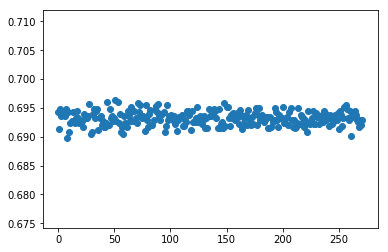

In [608]:
from matplotlib import pyplot
pyplot.scatter(y = loss, x = range(len(loss)))

In [599]:
# Train accuracy
sess.run(tf.local_variables_initializer())
print(sess.run([acc,acc_op], feed_dict= {X: X_train_b, Y: Y_train_b}))
print(sess.run([pre,pre_op], feed_dict= {X: X_train_b, Y: Y_train_b}))
print(sess.run([rec,rec_op], feed_dict= {X: X_train_b, Y: Y_train_b}))
print(sess.run([fn,fn_op], feed_dict= {X: X_train_b, Y: Y_train_b}))

[0.0, 0.5]
[0.0, 0.5]
[0.0, 1.0]
[0.0, 0.0]


In [597]:
# Test accuracy
sess.run(tf.local_variables_initializer())
print(sess.run([acc,acc_op], feed_dict= {X: X_test, Y: Y_test}))
print(sess.run([pre,pre_op], feed_dict= {X: X_test, Y: Y_test}))
print(sess.run([rec,rec_op], feed_dict= {X: X_test, Y: Y_test}))
print(sess.run([fn,fn_op], feed_dict= {X: X_test, Y: Y_test}))

[0.0, 0.11138134]
[0.0, 0.11138134]
[0.0, 1.0]
[0.0, 0.0]
